In [3]:
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Reading dataset in pandas
df = pd.read_csv("Raymond.csv")
#Droping unwanted columns
df.drop(["Date", "Adj Close"], axis=1, inplace=True)
print("Shape ->",df.shape)
df.head()

Shape -> (6353, 5)


,Open,High,Low,Close,Volume
0,177.333328,180.000000,177.333328,180.000000,225.0
1,180.000000,180.333328,179.000000,179.966660,1875.0
2,180.000000,180.000000,180.000000,180.000000,525.0
3,180.000000,180.000000,180.000000,180.000000,75.0
4,177.000000,177.000000,174.333328,174.333328,525.0


In [5]:
#Reordering columns
df = df[['Open', 'High', 'Low', 'Volume', 'Close']]
df['Close_Tom'] =  df['Close']
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,177.333328,180.000000,177.333328,225.0,180.000000,180.000000
1,180.000000,180.333328,179.000000,1875.0,179.966660,179.966660
2,180.000000,180.000000,180.000000,525.0,180.000000,180.000000
3,180.000000,180.000000,180.000000,75.0,180.000000,180.000000
4,177.000000,177.000000,174.333328,525.0,174.333328,174.333328


In [6]:
#Shifting whole dataset down by one row so we can use yesterdays data to predict todays closing price
df['Close_Tom'] =  df['Close_Tom'].shift(-1)
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,177.333328,180.000000,177.333328,225.0,180.000000,179.966660
1,180.000000,180.333328,179.000000,1875.0,179.966660,180.000000
2,180.000000,180.000000,180.000000,525.0,180.000000,180.000000
3,180.000000,180.000000,180.000000,75.0,180.000000,174.333328
4,177.000000,177.000000,174.333328,525.0,174.333328,176.166672


In [7]:
#Reordering columns
df = df[['Open', 'High', 'Low', 'Volume', 'Close', 'Close_Tom']]
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,177.333328,180.000000,177.333328,225.0,180.000000,179.966660
1,180.000000,180.333328,179.000000,1875.0,179.966660,180.000000
2,180.000000,180.000000,180.000000,525.0,180.000000,180.000000
3,180.000000,180.000000,180.000000,75.0,180.000000,174.333328
4,177.000000,177.000000,174.333328,525.0,174.333328,176.166672


In [8]:
#Filling null values using pad values, will fill next rows values to empty cells
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

Open         0
High         0
Low          0
Volume       0
Close        0
Close_Tom    0
dtype: int64

<AxesSubplot:>

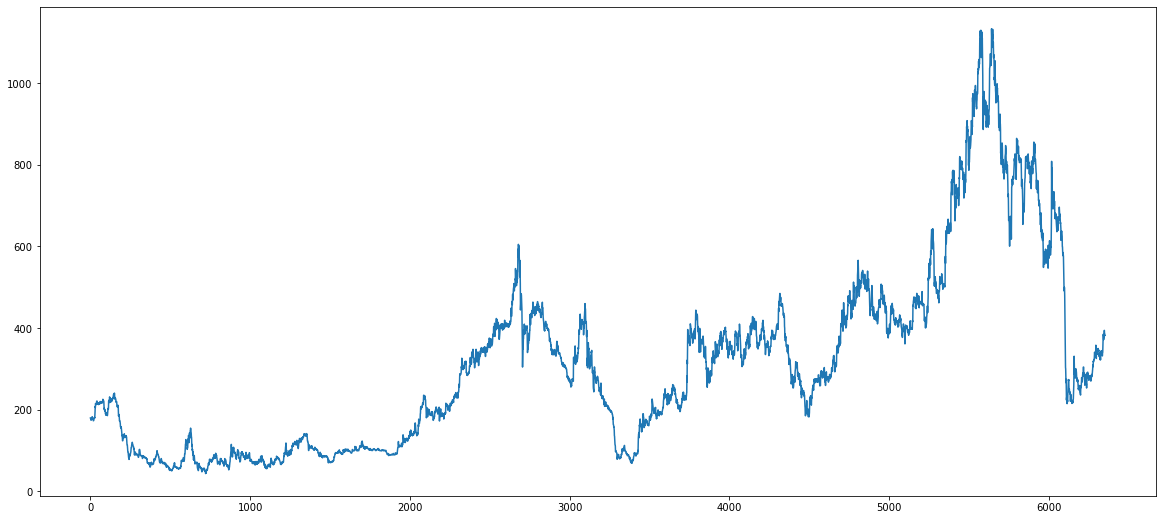

In [9]:
#Dataset Plotted
df['Close'].plot(figsize=(20,9))

In [10]:
#columns for x and y
x  = df[['Open','High','Low','Volume', 'Close']]
y = df['Close_Tom']

In [11]:
#Normalising data
scaler = MinMaxScaler()
df[['Open','High','Low','Volume', 'Close']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Volume', 'Close']])
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,0.120632,0.121207,0.124045,0.000020,0.125075,179.966660
1,0.123063,0.121508,0.125592,0.000171,0.125044,180.000000
2,0.123063,0.121207,0.126520,0.000048,0.125075,180.000000
3,0.123063,0.121207,0.126520,0.000007,0.125075,174.333328
4,0.120328,0.118497,0.121260,0.000048,0.119869,176.166672


In [12]:
#Splitting data
x_train , x_test , y_train , y_test = train_test_split(x ,y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4741, 5)
(1581, 5)
(4741,)
(1581,)


---
# Random Forest

In [13]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
model_rf.fit(x_train, y_train)   

RandomForestRegressor(random_state=0)

In [14]:
#predicting stock price using our model
preds_rf = model_rf.predict(x_test)

dfpred_rf = pd.DataFrame({'Actual':y_test,'Predicted':preds_rf, 'Difference':abs(y_test-preds_rf)})
dfpred_rf.head(10)

,Actual,Predicted,Difference
1069,71.849998,77.749499,5.899501
3346,99.349998,101.927000,2.577002
5160,470.250000,466.805000,3.445000
615,126.150002,135.619837,9.469835
228,114.800003,122.366501,7.566498
4717,434.399994,433.213497,1.186497
4467,233.100006,242.357999,9.257993
5967,574.099976,558.891505,15.208471
1503,71.650002,72.873367,1.223365
6248,275.000000,277.865502,2.865502


In [15]:
#Different Metrics calculated using our model
print("Score:", model_rf.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_rf))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_rf))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_rf))**0.5)
print('Loss:', abs(y_test-preds_rf).mean())

Score: 0.9977412682280045
Mean Absolute Error: 6.104896145508854
Mean Squared  Error: 107.33538091271599
Root Mean Squared Error: 10.36027899782221
Loss: 6.104896145508854


---
# k-NN

In [16]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
knn = neighbors.KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=7)
model_knn.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]})

In [17]:
#predicting stock price using our model
preds_knn = model_knn.predict(x_test)

dfpred_knn = pd.DataFrame({'Actual':y_test,'Predicted':preds_knn, 'Difference':abs(y_test-preds_knn)})
dfpred_knn.head(10)

,Actual,Predicted,Difference
1069,71.849998,224.974998,153.125000
3346,99.349998,108.625000,9.275002
5160,470.250000,394.550003,75.699997
615,126.150002,237.025009,110.875007
228,114.800003,101.525002,13.275001
4717,434.399994,394.050003,40.349991
4467,233.100006,203.625004,29.475002
5967,574.099976,305.100006,268.999970
1503,71.650002,92.524997,20.874995
6248,275.000000,324.800003,49.800003


In [18]:
model_knn.get_params()

{'cv': 7,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsRegressor(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [19]:
#Different Metrics calculated using our model
print("Score:", model_knn.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_knn))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_knn))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_knn))**0.5)
print('Loss:', abs(y_test-preds_knn).mean())

Score: 0.49910142239694133
Mean Absolute Error: 93.69035452213791
Mean Squared  Error: 23802.799558693103
Root Mean Squared Error: 154.2815593604534
Loss: 93.69035452213791


---
# Decision Tree

In [20]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [21]:
#predicting stock price using our model
preds_dt = model_dt.predict(x_test)

dfpred_dt = pd.DataFrame({'Actual':y_test,'Predicted':preds_dt, 'Difference':abs(y_test-preds_dt)})
dfpred_dt.head(10)

,Actual,Predicted,Difference
1069,71.849998,78.449997,6.599999
3346,99.349998,102.099998,2.750000
5160,470.250000,472.200012,1.950012
615,126.150002,141.149994,14.999992
228,114.800003,122.050003,7.250000
4717,434.399994,436.500000,2.100006
4467,233.100006,240.199997,7.099991
5967,574.099976,548.900024,25.199952
1503,71.650002,73.599998,1.949996
6248,275.000000,280.250000,5.250000


In [22]:
#Different Metrics calculated using our model
print("Score:", model_dt.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_dt))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_dt))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_dt))**0.5)
print('Loss:', abs(y_test-preds_dt).mean())

Score: 0.9964155257519319
Mean Absolute Error: 8.185625973750792
Mean Squared  Error: 170.33492580143286
Root Mean Squared Error: 13.051242308739536
Loss: 8.185625973750792


---
# Linear Regression

In [23]:
#linear Regression
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [24]:
#Coefficients and Intercept of LR
print(model_lr.coef_)
print(model_lr.intercept_)

[ 1.05831231e-02 -9.18269486e-02  6.09758073e-02  3.13064954e-07
  1.02138916e+00]
0.5531107163972706


In [25]:
#predicting stock price using our model
preds_lr = model_lr.predict(x_test)

dfpred_lr = pd.DataFrame({'Actual':y_test,'Predicted':preds_lr, 'Difference':abs(y_test-preds_lr)})
dfpred_lr.head(10)

,Actual,Predicted,Difference
1069,71.849998,77.587566,5.737568
3346,99.349998,102.815969,3.465971
5160,470.250000,475.431446,5.181446
615,126.150002,135.704913,9.554911
228,114.800003,121.382486,6.582483
4717,434.399994,432.640370,1.759624
4467,233.100006,241.738522,8.638516
5967,574.099976,559.199115,14.900861
1503,71.650002,72.081839,0.431837
6248,275.000000,278.017186,3.017186


In [26]:
#Different Metrics calculated using our model
print("Score:", model_lr.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_lr))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_lr))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_lr))**0.5)
print('Loss:', abs(y_test-preds_lr).mean())

Score: 0.9980194127748
Mean Absolute Error: 5.388628892492308
Mean Squared  Error: 94.11789699132311
Root Mean Squared Error: 9.701437882670955
Loss: 5.388628892492308
